## **PCA (Core)**

Reducción de Dimensionalidad

**Descripción:**

En esta actividad, aplicarás el Análisis de Componentes Principales (PCA) para reducir la dimensionalidad de un conjunto de datos grande. Utilizaremos el dataset «Wine Quality» disponible en Kaggle, que contiene variables químicas que influyen en la calidad del vino. PCA te permitirá reducir el número de características sin perder mucha información.

Enlace al dataset: https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009



**Objetivo:**

El objetivo principal es utilizar PCA para reducir la dimensionalidad del dataset, identificar los componentes principales, y analizar cómo contribuyen a la variabilidad de los datos. Esto facilitará la comprensión del conjunto de datos y permitirá crear modelos más eficientes.



**Instrucciones:**

**1. Carga de datos:**
* Descarga y carga el dataset «Wine Quality» de Kaggle. Examina el contenido del dataset y verifica las variables químicas que afectan la calidad del vino.
* El dataset contiene 12 variables como el nivel de acidez, el pH, el contenido de alcohol, entre otras.

In [ ]:
import pandas as pd

# Descripción del Dataset

El dataset consta de **1599 entradas** con un total de **12 columnas**, sin valores nulos. A continuación, se describen las columnas y sus tipos de datos:

| #   | Columna                | Tipo de Datos | Descripción                                              |
|-----|------------------------|---------------|----------------------------------------------------------|
| 0   | `fixed acidity`        | `float64`     | Nivel de acidez fija (g/dm³).                           |
| 1   | `volatile acidity`     | `float64`     | Nivel de acidez volátil (g/dm³).                        |
| 2   | `citric acid`          | `float64`     | Concentración de ácido cítrico (g/dm³).                 |
| 3   | `residual sugar`       | `float64`     | Azúcar residual después de la fermentación (g/dm³).     |
| 4   | `chlorides`            | `float64`     | Contenido de cloruros (salinidad, g/dm³).               |
| 5   | `free sulfur dioxide`  | `float64`     | Dióxido de azufre libre (mg/L).                         |
| 6   | `total sulfur dioxide` | `float64`     | Dióxido de azufre total (mg/L).                         |
| 7   | `density`              | `float64`     | Densidad relativa del vino (g/cm³).                     |
| 8   | `pH`                   | `float64`     | Medida de acidez o alcalinidad.                         |
| 9   | `sulphates`            | `float64`     | Nivel de sulfatos (g/dm³).                              |
| 10  | `alcohol`              | `float64`     | Porcentaje de alcohol (% vol).                          |
| 11  | `quality`              | `int64`       | Puntuación de calidad del vino (0 a 10).                |

### Información General

- **Número de registros:** 1599.
- **Número de columnas:** 12.
- **Memoria utilizada:** 150 KB.
- **Tipos de datos:**
  - `float64`: 11 columnas.
  - `int64`: 1 columna.
- **Datos nulos:** Ninguno.


In [4]:
# Cargar el archivo CSV
file_path = "../data/winequality-red.csv"  # Cambia esto a la ruta de tu archivo
df = pd.read_csv(file_path)

# Examinar las primeras filas del dataset
print("Primeras filas del dataset:")
print(df.head())


Primeras filas del dataset:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8    

In [5]:

# Resumen de las columnas y tipos de datos
print("\nInformación general del dfset:")
print(df.info())

# Estadísticas descriptivas de las variables
print("\nEstadísticas descriptivas:")
print(df.describe())

# Verificar las variables químicas que afectan la calidad del vino
print("\nColumnas del dataset:")
print(df.columns)

# Analizar correlación de variables químicas con la calidad
correlation_matrix = df.corr()
print("\nCorrelación con la calidad del vino:")
print(correlation_matrix['quality'].sort_values(ascending=False))


Información general del dfset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None

Estadísticas descriptivas:
       fixed acidity  volatile acidity  citric acid  residual

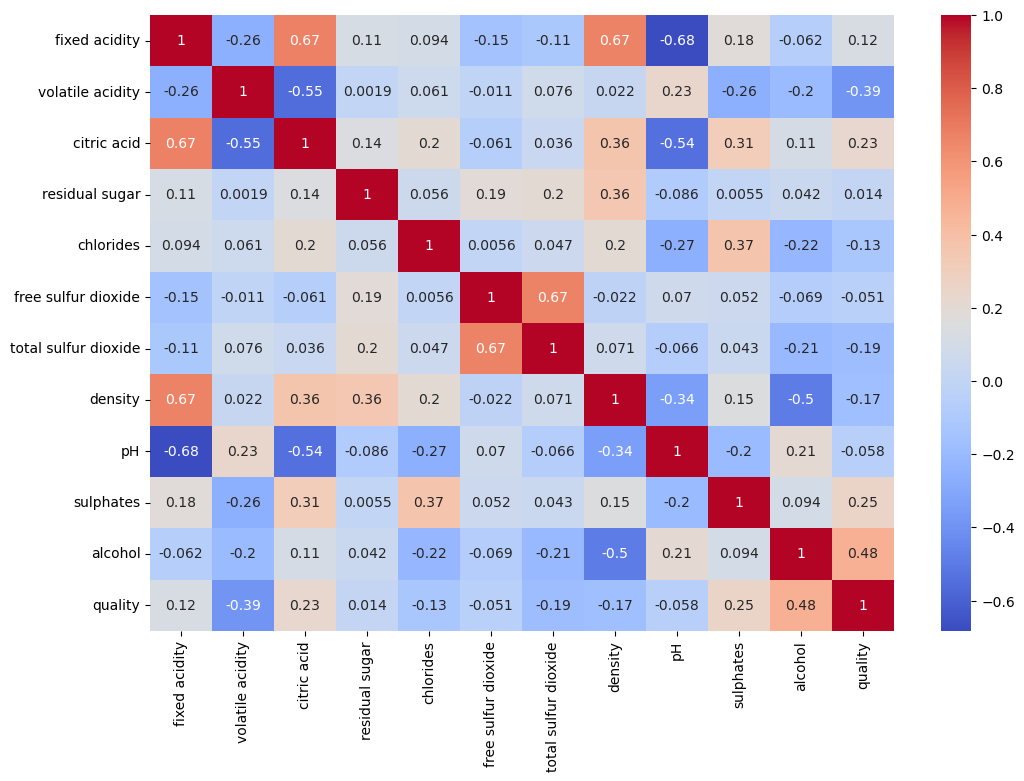

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define el tamaño de la figura
plt.figure(figsize=(12, 8))  # Cambia los valores para ajustar el tamaño (ancho, alto)

sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()


In [29]:
# Correlación entre 'fixed acidity' y 'quality'
correlation_fixed_acidity_quality = correlation_matrix.loc['fixed acidity', 'quality']
print(f"Correlación entre 'fixed acidity' y 'quality': {correlation_fixed_acidity_quality}")


Correlación entre 'fixed acidity' y 'quality': 0.12405164911322257


In [30]:
# Filtrar correlaciones mayores a un umbral (por ejemplo, 0.5)
high_correlation = correlation_matrix[correlation_matrix > 0.5]
print(high_correlation)

                      fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000               NaN     0.671703   
volatile acidity                NaN               1.0          NaN   
citric acid                0.671703               NaN     1.000000   
residual sugar                  NaN               NaN          NaN   
chlorides                       NaN               NaN          NaN   
free sulfur dioxide             NaN               NaN          NaN   
total sulfur dioxide            NaN               NaN          NaN   
density                    0.668047               NaN          NaN   
pH                              NaN               NaN          NaN   
sulphates                       NaN               NaN          NaN   
alcohol                         NaN               NaN          NaN   
quality                         NaN               NaN          NaN   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity    

**Exploración y preprocesamiento de datos:**
* Realiza una exploración inicial del dataset. Revisa los valores nulos, los rangos de las variables y cualquier valor atípico que pueda afectar el rendimiento de PCA.
* Normaliza las variables, ya que PCA es sensible a las escalas de las características. Esto asegura que las variables tengan una contribución equitativa en la formación de los componentes principales.

**Valores nulos**

In [11]:
# Revisión de valores nulos por columna
nulos = df.isnull().sum()
print("Valores nulos por columna:")
print(nulos)


Valores nulos por columna:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


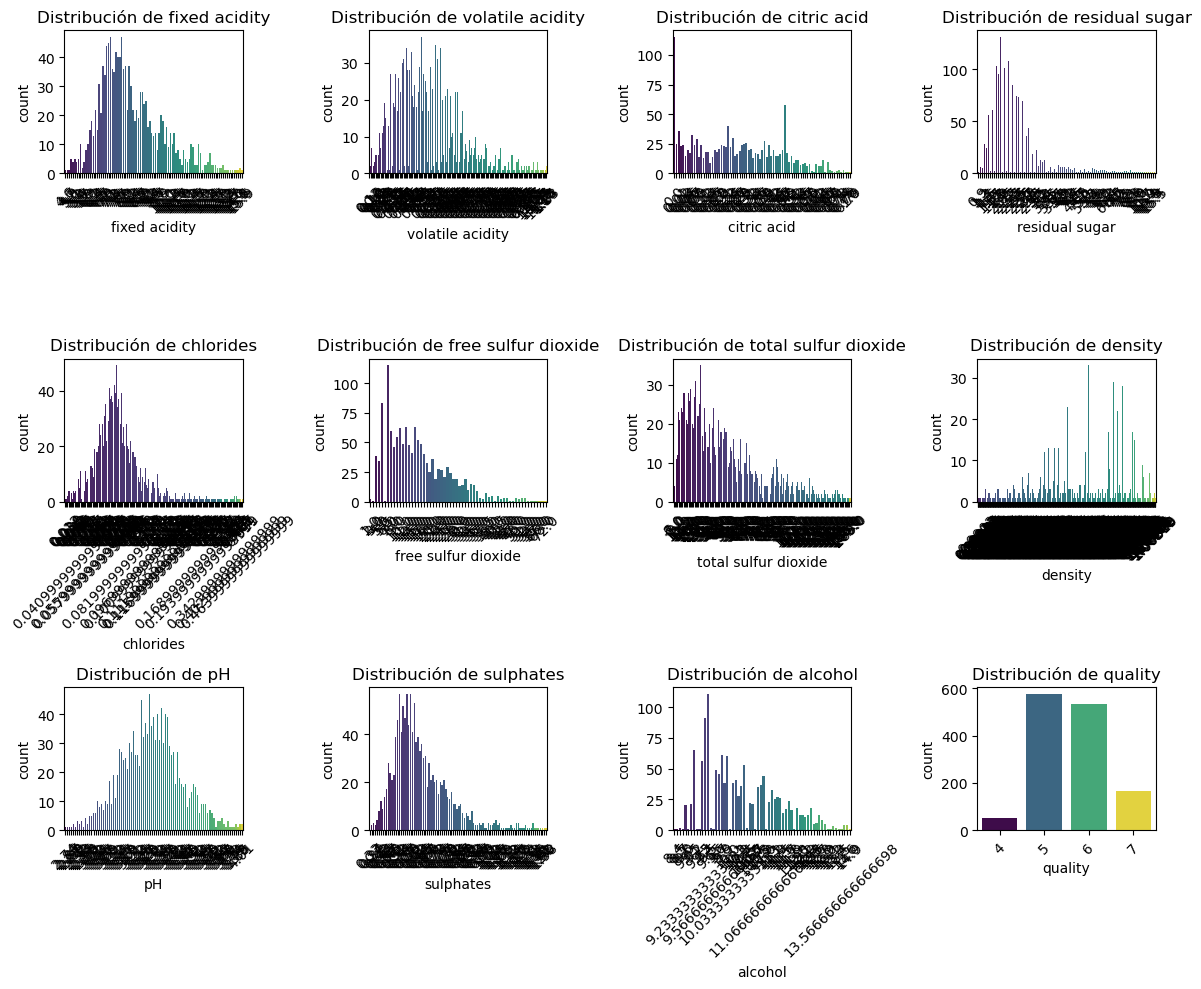

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Lista de las columnas numéricas en el dataset
numeric_columns = df.select_dtypes(include='number').columns

# Crear una figura con varios subgráficos (uno para cada variable numérica)
plt.figure(figsize=(12, 10))

# Crear un gráfico de barras para cada columna numérica
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(3, 4, i)  # 3 filas, 4 columnas, i-esimo gráfico
    sns.countplot(x=df[column], hue=df[column], palette="viridis", legend=False)
    plt.title(f'Distribución de {column}')
    plt.xticks(rotation=45)

plt.tight_layout()  # Ajustar el diseño
plt.show()



**Detección de valores atípicos**

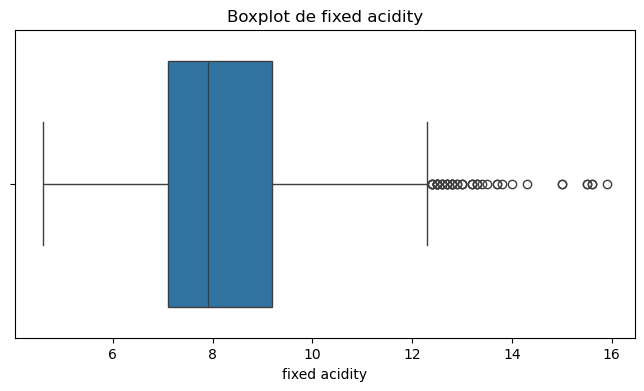

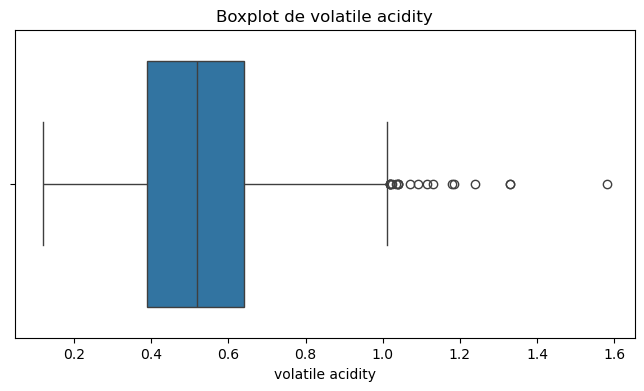

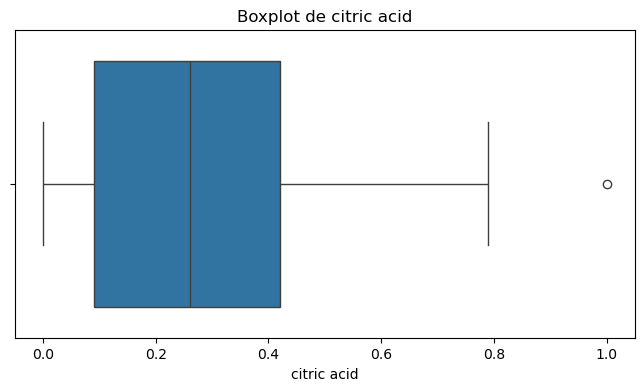

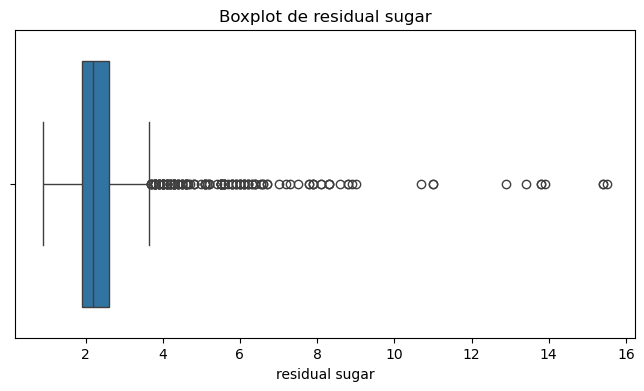

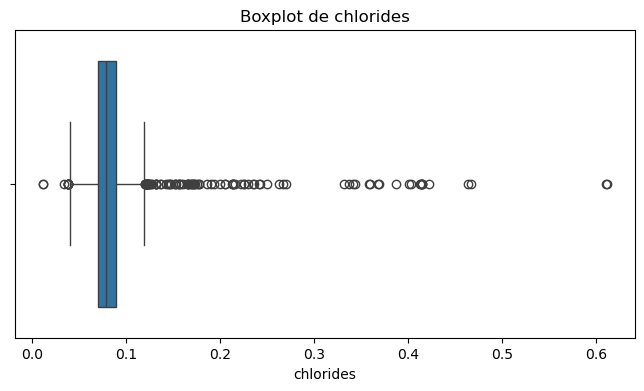

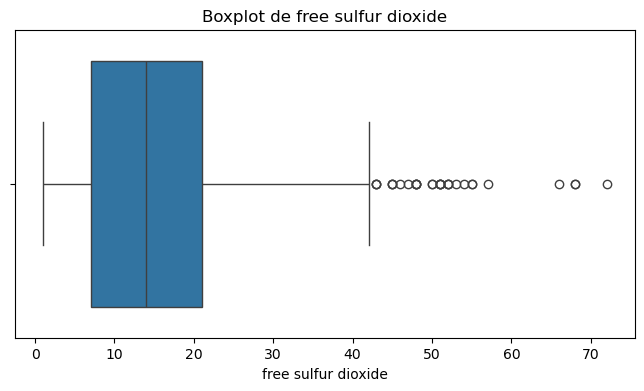

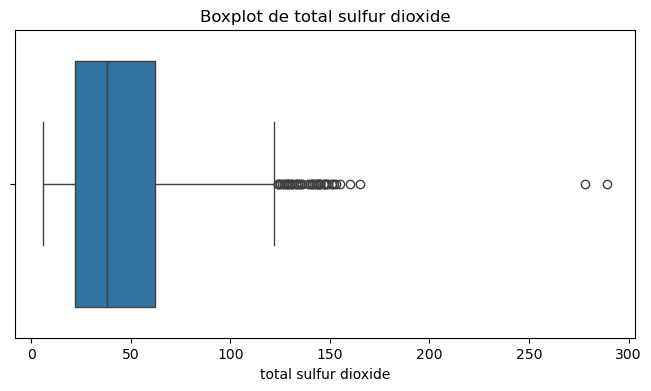

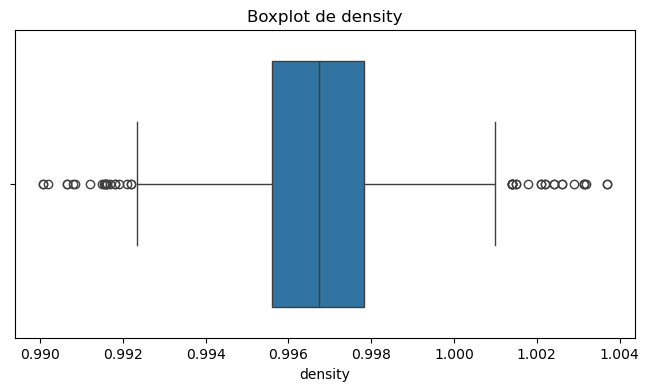

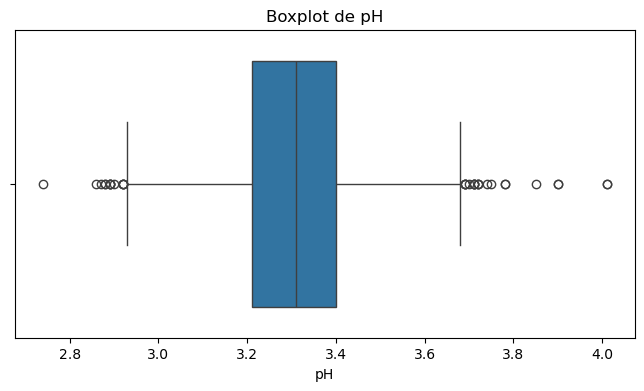

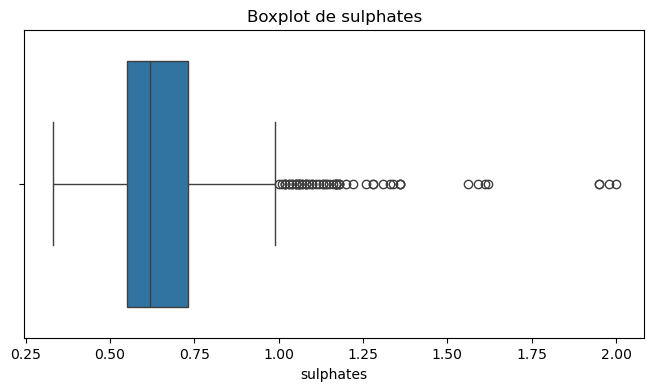

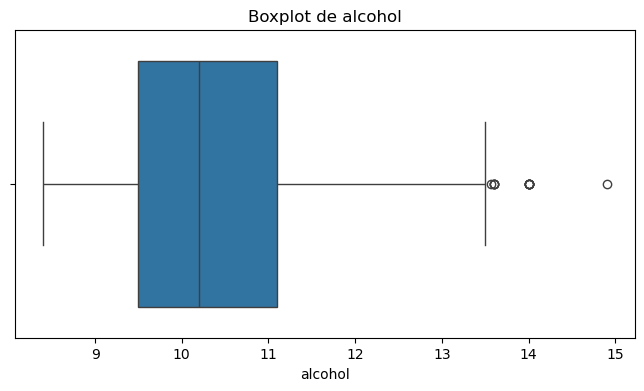

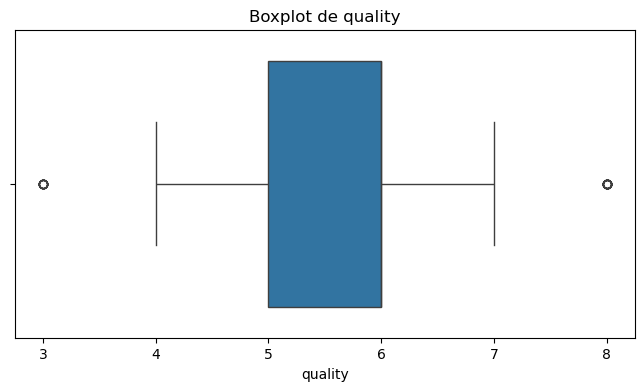

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear boxplots para cada variable numérica
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot de {col}')
    plt.show()


**Eliminar valores extremos:**

In [13]:
# Ejemplo: eliminar valores mayores al percentil 99 o menores al percentil 1
Q1 = df[col].quantile(0.25)
Q3 = df[col].quantile(0.75)
IQR = Q3 - Q1
filtro = (df[col] >= Q1 - 1.5 * IQR) & (df[col] <= Q3 + 1.5 * IQR)
df = df[filtro]


In [16]:
# Encontrar duplicados (devuelve un booleano por fila)
duplicados = df.duplicated()

# Mostrar las filas duplicadas
print("Duplicados:")
print(df[duplicados])


Duplicados:
      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
4               7.4             0.700         0.00            1.90      0.076   
11              7.5             0.500         0.36            6.10      0.071   
27              7.9             0.430         0.21            1.60      0.106   
40              7.3             0.450         0.36            5.90      0.074   
65              7.2             0.725         0.05            4.65      0.086   
...             ...               ...          ...             ...        ...   
1563            7.2             0.695         0.13            2.00      0.076   
1564            7.2             0.695         0.13            2.00      0.076   
1567            7.2             0.695         0.13            2.00      0.076   
1581            6.2             0.560         0.09            1.70      0.053   
1596            6.3             0.510         0.13            2.30      0.076   

      free sulf

In [19]:
# Contar el número de filas duplicadas
num_duplicados = duplicados.sum()
print(f"Número de filas duplicadas: {num_duplicados}")

Número de filas duplicadas: 239


In [18]:
# Eliminar duplicados en el DataFrame original
df.drop_duplicates(inplace=True)

# Verificar el número de filas tras eliminar duplicados
print("Número de filas tras eliminar duplicados:", len(df))


Número de filas tras eliminar duplicados: 1332


In [20]:
# Encontrar duplicados (devuelve un booleano por fila)
duplicados = df.duplicated()

# Mostrar las filas duplicadas
print("Duplicados:")
print(df[duplicados])


Duplicados:
Empty DataFrame
Columns: [fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, alcohol, quality]
Index: []


**Normalización con StandardScaler**

In [21]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Seleccionar las variables numéricas para normalizar
variables = df.drop('quality', axis=1)  # Suponiendo que "quality" es la etiqueta y no se normaliza

# Aplicar StandardScaler
scaler = StandardScaler()
variables_normalizadas = scaler.fit_transform(variables)

# Convertir a DataFrame para conservar nombres de columnas
df_normalizado = pd.DataFrame(variables_normalizadas, columns=variables.columns)

# Verificar la normalización
print("Media de cada columna después de la normalización:")
print(df_normalizado.mean())
print("\nDesviación estándar de cada columna después de la normalización:")
print(df_normalizado.std())


Media de cada columna después de la normalización:
fixed acidity          -2.773891e-16
volatile acidity       -6.934726e-17
citric acid            -1.600321e-16
residual sugar          2.933923e-17
chlorides              -5.334405e-17
free sulfur dioxide     8.535048e-17
total sulfur dioxide   -6.401286e-17
density                 1.561914e-14
pH                     -3.819434e-15
sulphates              -2.453826e-16
alcohol                 6.828038e-16
dtype: float64

Desviación estándar de cada columna después de la normalización:
fixed acidity           1.000376
volatile acidity        1.000376
citric acid             1.000376
residual sugar          1.000376
chlorides               1.000376
free sulfur dioxide     1.000376
total sulfur dioxide    1.000376
density                 1.000376
pH                      1.000376
sulphates               1.000376
alcohol                 1.000376
dtype: float64


**Aplicación de PCA:**
* Implementa PCA en el dataset para reducir la dimensionalidad. Determina cuántos componentes principales se necesitan para capturar al menos el 90% de la variabilidad de los datos.
* Visualiza el gráfico de «explained variance» para mostrar cómo cada componente principal contribuye a la variabilidad total de los datos.

Se necesitan 7 componentes para explicar al menos el 90% de la variabilidad de los datos.


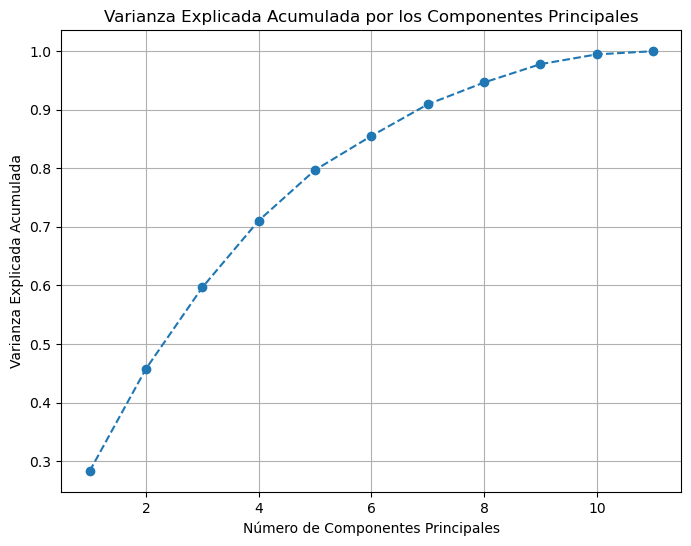

In [22]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd

# Paso 1: Seleccionar las variables numéricas para normalizar (sin la columna de calidad)
#variables = df.drop('quality', axis=1)

# Normalización de los datos
#scaler = StandardScaler()
#variables_normalizadas = scaler.fit_transform(variables)

# Paso 2: Aplicar PCA
pca = PCA()
pca.fit(variables_normalizadas)

# Paso 3: Determinar cuántos componentes explicar al menos el 90% de la variabilidad
explained_variance_ratio = pca.explained_variance_ratio_

# Cálculo del número mínimo de componentes para el 90% de la variabilidad
total_variance = 0
num_components = 0

for i, variance in enumerate(explained_variance_ratio):
    total_variance += variance
    num_components += 1
    if total_variance >= 0.90:
        break

print(f"Se necesitan {num_components} componentes para explicar al menos el 90% de la variabilidad de los datos.")

# Paso 4: Visualizar el gráfico de explained variance
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio.cumsum(), marker='o', linestyle='--')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Explicada Acumulada')
plt.title('Varianza Explicada Acumulada por los Componentes Principales')
plt.grid(True)
plt.show()


**Interpretación de los componentes principales:**
* Analiza los coeficientes de cada componente principal para identificar qué variables tienen la mayor influencia en cada uno de ellos.
* Discute cómo la reducción de dimensionalidad mediante PCA puede simplificar la construcción de modelos predictivos al eliminar redundancia en las características.

In [23]:
# Analizar los coeficientes de cada componente principal
components = pca.components_

# Crear un DataFrame para interpretar los coeficientes
df_components = pd.DataFrame(components, columns=variables.columns)

# Ver los coeficientes de los primeros 5 componentes
print(df_components.head())


   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       0.483910         -0.235167     0.461226        0.136456   0.220010   
1      -0.116888          0.282505    -0.155694        0.243329   0.125530   
2      -0.128922         -0.445456     0.241391        0.132192  -0.087929   
3      -0.243218          0.072840    -0.073701       -0.391893   0.652969   
4      -0.086498          0.250167    -0.062944        0.741132   0.274880   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0            -0.019996              0.040987  0.392889 -0.442856   0.254516   
1             0.513825              0.576030  0.224947  0.003741  -0.048020   
2             0.432216              0.319366 -0.347664  0.065453   0.250257   
3            -0.020887             -0.026924 -0.184338  0.003571   0.548727   
4            -0.169930             -0.191730  0.146958  0.235511   0.224758   

    alcohol  
0 -0.115897  
1 -0.398213  
2  0.474220  


In [24]:
df_components.iloc[0]


fixed acidity           0.483910
volatile acidity       -0.235167
citric acid             0.461226
residual sugar          0.136456
chlorides               0.220010
free sulfur dioxide    -0.019996
total sulfur dioxide    0.040987
density                 0.392889
pH                     -0.442856
sulphates               0.254516
alcohol                -0.115897
Name: 0, dtype: float64

**Resumen de los beneficios de la reducción de dimensionalidad mediante PCA**

1. **Eliminación de redundancia**: Las variables correlacionadas se combinan en componentes principales,
   lo que elimina la multicolinealidad y mejora la eficiencia del modelo.
2. **Reducción de ruido**: Los componentes que no explican una variabilidad significativa pueden ser eliminados,
   lo que mejora la precisión de los modelos predictivos y reduce el sobreajuste.
3. **Mejora en la interpretación**: Al reducir las dimensiones del espacio de características, los modelos se hacen más comprensibles.
4. **Aceleración del proceso de modelado**: Menos características a procesar permiten tiempos de entrenamiento más rápidos.
5. **Mayor estabilidad**: Eliminar características redundantes y ruidosas reduce la varianza de los modelos predictivos.



Este resultado muestra los coeficientes (también conocidos como "loadings") de las variables en el primer componente principal de un Análisis de Componentes Principales (PCA). Cada valor representa cuánto contribuye una variable en particular a la formación de ese componente. Los valores positivos indican una relación directa con el componente, mientras que los negativos indican una relación inversa.

**Se desglosa cada variable:**

**fixed acidity (0.483910):** La acidez fija tiene una contribución positiva al primer componente principal. Es decir, a medida que la acidez fija aumenta, también lo hace el valor del primer componente principal.

**volatile acidity (-0.235167):** La acidez volátil tiene una contribución negativa al primer componente. Si la acidez volátil aumenta, el valor del primer componente principal disminuye.

**citric acid (0.461226):** El ácido cítrico tiene una contribución positiva al primer componente. Esto significa que un aumento en el ácido cítrico se asocia con un aumento en el valor del primer componente.

**residual sugar (0.136456):** El azúcar residual tiene una contribución positiva, aunque relativamente pequeña, al primer componente. Esto indica que un aumento en el azúcar residual tiene un pequeño efecto en el valor del primer componente.

**chlorides (0.220010):** Los cloruros tienen una contribución positiva al primer componente. A medida que aumentan los cloruros, también lo hace el primer componente.

**free sulfur dioxide (-0.019996):** El dióxido de azufre libre tiene una contribución negativa, pero es muy pequeña, lo que sugiere que no tiene una gran influencia en el primer componente.

**total sulfur dioxide (0.040987):** El dióxido de azufre total tiene una contribución positiva, aunque igualmente pequeña, al primer componente.

**density (0.392889):** La densidad tiene una contribución positiva considerable al primer componente. A medida que la densidad aumenta, también lo hace el valor del primer componente.

**pH (-0.442856):** El pH tiene una contribución negativa significativa al primer componente. Si el pH aumenta, el valor del primer componente disminuirá.

**sulphates (0.254516):** Los sulfatos tienen una contribución positiva al primer componente. Un aumento en los sulfatos se asocia con un aumento en el valor del primer componente.

**alcohol (-0.115897):** El contenido de alcohol tiene una contribución negativa al primer componente. Un aumento en el contenido de alcohol disminuye el valor del primer componente.


**Visualización y comparación:**
* Visualiza los datos proyectados en los primeros dos componentes principales utilizando un gráfico de dispersión.
* Si el dataset tiene etiquetas de clase (como la calidad del vino), observa cómo se distribuyen las clases en el espacio de los componentes principales.

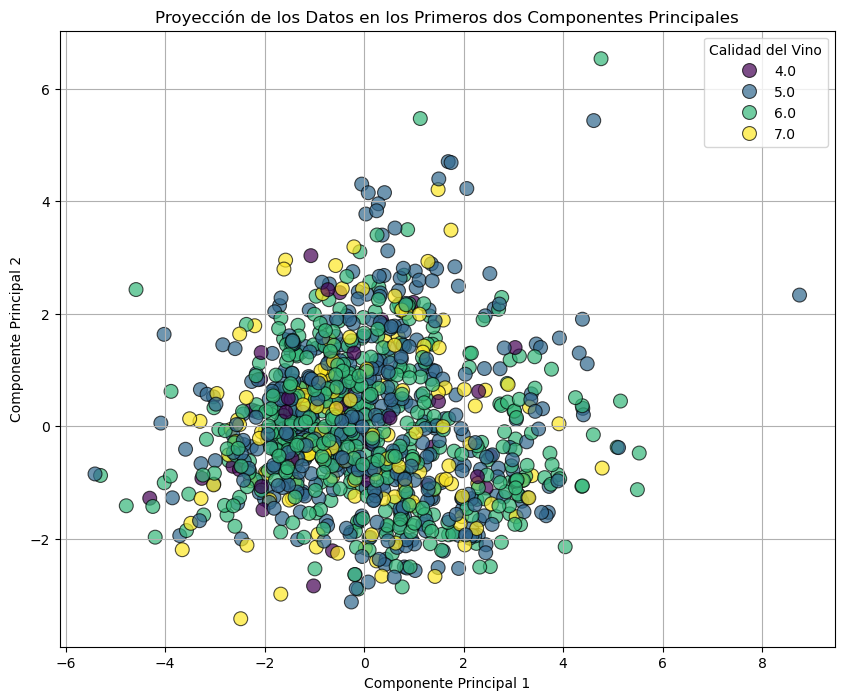

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Proyectamos los datos a los primeros dos componentes principales
pca = PCA(n_components=2)
pca_components = pca.fit_transform(variables_normalizadas)  # Asumiendo que df_normalized es tu dataset normalizado

# Crear un DataFrame con los componentes principales y las etiquetas de calidad
pca_df = pd.DataFrame(pca_components, columns=['PC1', 'PC2'])
pca_df['quality'] = df['quality']  # Asumimos que la columna 'quality' existe en el dataset original

# Visualizar los datos proyectados en los dos primeros componentes principales
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='quality', palette='viridis', data=pca_df, s=100, edgecolor='k', alpha=0.7)
plt.title('Proyección de los Datos en los Primeros dos Componentes Principales')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title='Calidad del Vino')
plt.grid(True)
plt.show()


**Observacion**

* El gráfico muestra la proyección de los datos en los dos primeros componentes principales. Se observa que las clases de calidad del vino se agrupan de manera algo separada, especialmente los vinos de mayor calidad. A pesar de algunas superposiciones, esto sugiere que los primeros dos componentes pueden capturar parte importante de la variabilidad relacionada con la calidad. Algunos puntos atípicos se alejan del resto del grupo, lo que podría indicar vinos con características inusuales. En general, el análisis muestra cómo PCA puede simplificar la visualización de datos multidimensionales y facilitar la identificación de patrones de calidad en los vinos.


In [28]:
print(pca_df[['PC1', 'PC2', 'quality']])


           PC1       PC2  quality
0    -1.629462  0.479849      5.0
1    -0.758946  1.862994      5.0
2    -0.734747  0.890638      5.0
3     2.361025 -0.287000      6.0
4    -1.587968  0.597877      NaN
...        ...       ...      ...
1327 -1.204646  0.946319      NaN
1328 -2.132493  0.827386      5.0
1329 -2.175099  0.898398      6.0
1330 -2.244627  0.996461      NaN
1331 -0.437190 -0.562748      5.0

[1332 rows x 3 columns]


* Esta actividad tiene como objetivo principal aplicar PCA para la reducción de dimensionalidad en un dataset real. Al reducir la dimensionalidad, PCA facilita la creación de modelos más interpretables y eficientes.

**Beneficios de PCA en la creación de modelos:**

**Mejora la interpretabilidad:** Al reducir las dimensiones, es más fácil entender qué variables están impulsando los resultados de un modelo predictivo.

**Optimización de recursos computacionales:** Modelos con menos características suelen ser más rápidos de entrenar y menos propensos al sobreajuste (overfitting).

**Facilitación de la visualización:** La reducción de dimensiones permite representar los datos en dos o tres dimensiones, lo que facilita la visualización y la exploración de patrones.

**Conclusión:**

La aplicación de PCA para reducir la dimensionalidad en un dataset real no solo mejora la eficiencia de los modelos predictivos, sino que también facilita la comprensión de los patrones en los datos, eliminando redundancia y enfocándose en las características más relevantes. Esto es crucial cuando se trabaja con datasets grandes o con muchas variables, donde el procesamiento de datos puede ser costoso o el modelo puede volverse muy complejo.